## Pair Programming - Regresión lineal 5

### Normalización

---

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficas
import seaborn as sns
import matplotlib.pyplot as plt

# Test estadísticos y normalización
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kstest

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../archivos/metro_1.csv", index_col=0)

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:
- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste.



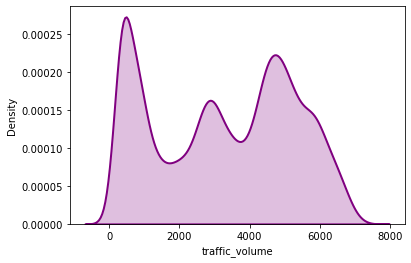

In [8]:
sns.distplot(df['traffic_volume'], hist= False, color= 'purple', kde_kws= {"shade": True, "linewidth": 2});

Observamos en la gráfica que la variable respuesta 'traffic_volume' no tiene una distribución normal de los datos ya que no tiene la forma de la campana de Gauss. 

Al ver la distribución muy anómala, obtamos por utilizar el método de normalización Boxcox.

### Aplicamos el método Boxcox

In [9]:
df['traffic_box'], lambda_ajustada = stats.boxcox(df['traffic_volume'])

ValueError: Data must be positive.

No podemos utilizar este método por tener valores 0 y valores negativos por lo que vamos a intentar normalizar los datos con otro método.

In [15]:
df['traffic_volume'].isin([0]).sum() #tenemos dos registros con valor 0

2

In [33]:
#df['traffic_box'], lambda_ajustada = df['traffic_volume'].apply(lambda x: stats.boxcox(x) if x > 0 else 0)

### Aplicamos el método Mixmax

In [18]:

minmax = MinMaxScaler()

In [19]:
minmax.fit(df[['traffic_volume']])

MinMaxScaler()

In [20]:
x_normalizada = minmax.transform(df[['traffic_volume']])

In [24]:
print(x_normalizada.max())
print(x_normalizada.min())

1.0
0.0


In [26]:
df_minmax = pd.DataFrame(x_normalizada, columns= ['traffic_minmax'])
df_minmax

,traffic_minmax
0,0.761676
1,0.620330
2,0.654808
3,0.690385
4,0.675549
...,...
48182,0.486676
48183,0.382005
48184,0.296566
48185,0.199176


In [27]:
df['traffic_minmax'] = df_minmax

In [28]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,traffic_minmax
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,0.761676
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,0.620330
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,0.654808
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,0.690385
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,0.675549


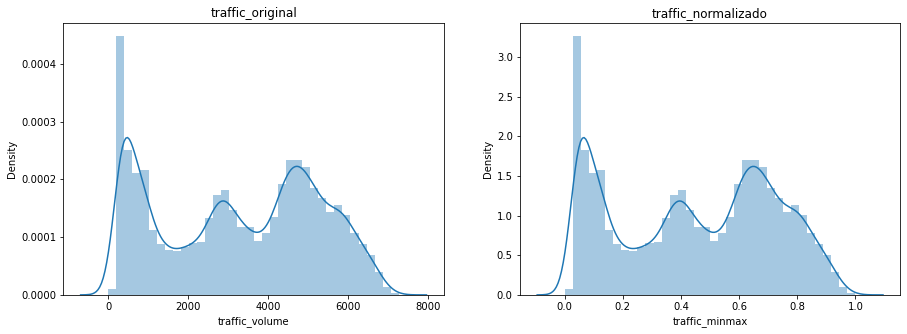

In [29]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('traffic_original')
axes[1].set_title('traffic_normalizado')

sns.distplot(df['traffic_volume'] ,ax = axes[0])
sns.distplot(df['traffic_minmax'], ax = axes[1]);

In [31]:
stats.shapiro(df['traffic_volume']) 

ShapiroResult(statistic=0.9327538013458252, pvalue=0.0)

In [30]:
stats.shapiro(df['traffic_minmax']) 

ShapiroResult(statistic=nan, pvalue=1.0)

Intuimos que no está pudiendo realizar correctamente el test pues el p-valor es > 0.05, por lo que aceptamos la H0, los datos son normales... y realmente ya solo con ver los datos en la gráfica vemos que no lo son. 

Llegamos a la conclusión que deberíamos hacer la repartición de los datos para estudiar y realizar las asunciones de solo una parte de los datos y lo vamos a realizar en pp_regresion_lineal_V_B

____

- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

Lo guardamos en pp_regresion_lineal_V_B como metro_2